In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [ ]:
immo_dataset = pd.read_csv('fulldata.csv')

immo_dataset.head(15)


In [ ]:
immo_dataset.info()

Data Cleaning

Fill empty values

In [ ]:
missing_percentage = immo_dataset.isna().mean() * 100
print(missing_percentage)

Replace space in postal_code

In [ ]:
immo_dataset['postal_code'] = immo_dataset['postal_code'].str.replace(' ', '')

Remove letters from postal codes.

In [ ]:
immo_dataset['postal_code'] = immo_dataset['postal_code'].str.replace('MK', '')
immo_dataset['postal_code'] = immo_dataset['postal_code'].str.replace('AN', '')
immo_dataset['postal_code'] = immo_dataset['postal_code'].str.replace('KA', '')
immo_dataset['postal_code'] = immo_dataset['postal_code'].str.replace('AG', '')

Remove erronous Postal Codes (with more than 4 digits)

In [ ]:
res = immo_dataset[immo_dataset['postal_code'].map(lambda x: len(x) >= 5)]
immo_dataset.drop(res.index, inplace=True)
print(immo_dataset['postal_code'].unique())
print(immo_dataset.shape)

We dropped columns from main data because it had hight % of missing values.

In [ ]:
drop_columns = ['locality', 'contruction_year', 'subtype_property', 'living_area', 'kitchen_fully_equiped', 'terrace_area', 'garden_surface', 'plot_land_surface', 'number_of_facades', 'building_state']
immo_dataset.drop(drop_columns , axis=1, inplace=True)
immo_dataset.head(10)



Define duplicates.

In [ ]:
duplicate_rows = immo_dataset.duplicated()
duplicate_data = immo_dataset[duplicate_rows]

print(duplicate_data)

In [ ]:
immo_dataset = immo_dataset.reset_index(drop=True)

Remove duplicates.

In [ ]:
immo_dataset.drop_duplicates(inplace=True)
immo_dataset.to_csv('immo_clean1.csv')

In [ ]:
immo_dataset.info()

Remove spaces from columns with objects.

In [ ]:
#remove space from all columns
immo_dataset_space_removed = immo_dataset.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
print(immo_dataset_space_removed)

Count empty values.

In [ ]:
#Find empty values
empty_values = immo_dataset.isna()

#Count the number of empty values in each column
empty_count = empty_values.sum()

#Display the columns with empty values
print("Columns with empty values:")
print(empty_count[empty_count > 0])

Data Analysis

In [ ]:
immo_dataset.shape

In [ ]:
immo_dataset.info()


Percentage of empty values.

In [ ]:
missing_percentage = immo_dataset.isna().mean() * 100
print(missing_percentage)


Find correlation between price and other variables

In [ ]:

categorical_columns = ['region', 'property_type', 'type_of_sale']
# Convert the categorical 'locality' column to numerical using one-hot encoding
encoded_data = pd.get_dummies(immo_dataset, columns=categorical_columns)

correlation_coefficient = encoded_data.corr()[['price']]

# Print the correlation coefficients

print(correlation_coefficient.sort_values(by=['price'], ascending=False))

Remove 'type_of_sale' column.

In [ ]:
drop_columns_type = ['type_of_sale']
immo_dataset_no_type_of_sale = immo_dataset.drop(drop_columns_type, axis=1)
immo_dataset_no_type_of_sale.head(10)

Plot correlation between price and other variables.

In [ ]:
# Define categorical columns.
categorical_columns = ['region', 'property_type']

# Convert the categorical 'locality' column to numerical using one-hot encoding
encoded_data = pd.get_dummies(immo_dataset_no_type_of_sale, columns=categorical_columns)

# Calculate the correlation using Pearson method
pearson_corr = encoded_data.corr(method='pearson')

# Sort the correlation values in descending order
sorted_correlation = pearson_corr.sort_values(by='price',ascending=False)

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.bar(sorted_correlation.index, sorted_correlation['price'])
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient (no units)')
plt.title('Correlation between Price and Other Variables')
plt.xticks(rotation=80)
plt.show()


Plot Correlation Heatmap.

In [ ]:
# Define categorical columns.
categorical_columns = ['region', 'property_type']

# Convert the categorical 'locality' column to numerical using one-hot encoding
encoded_data = pd.get_dummies(immo_dataset_no_type_of_sale, columns=categorical_columns)

# Calculate the correlation using Pearson method
pearson_corr = encoded_data.corr(method='pearson')
# pearson_corr_filtered = pearson_corr[pearson_corr >= 0.5].sort_values(by= 'price', ascending=False)

# Plotting the correlation heatmap
plt.figure(figsize=(16, 16))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Heatmap')
plt.show()

How are variables correlated to each other? 

There is a positive correlation between number of rooms and habitable surface.
Also positive correlation between number of rooms and type of property:house.
Positive correaltion between price and habitable surface.

Calculate correlation of all variables between them.

In [ ]:
# Define categorical columns.
categorical_columns = ['region', 'property_type']
# Convert the categorical 'locality' column to numerical using one-hot encoding
encoded_data = pd.get_dummies(immo_dataset_no_type_of_sale, columns=categorical_columns)

# Calculate correlation coefficient.
correlation_coefficient = encoded_data.corr()

# Print the correlation coefficients
print(correlation_coefficient)

Which variables have the greatest influence on the price?

The variables with the most influence on property price are:

Habitable surface

Number of rooms

Presence of swimming pool

Region: Brussels

Presence of terrace.



Which variables have the least influence on the price?

The variables with the least influence on price are:

Region:Flanders

If it is furnished

If it has open fire

How many qualitative and quantitative variables are there? How would you transform these values into numerical values?

We have three quantitative and eight qualitative variables.

In [ ]:
immo_dataset_no_type_of_sale.info()

Percentage of missing values per column?



In [ ]:
missing_percentage = immo_dataset_no_type_of_sale.isna().mean() * 100
print(missing_percentage)

Step 3 : Data Interpretation

Plot the outliers.

In [ ]:
#Convert 'price' column to Pandas Series
price_series = pd.Series(immo_dataset_no_type_of_sale['price'])

#Create the scatter plot
plt.scatter(range(len(price_series)), price_series)

#Set plot title and labels
plt.title('Scatter plot for Price Variation')
plt.xlabel('Listing Index')
plt.ylabel('Price: 100.000 euros')

#Display the scatter plot
plt.show()

Which variables would you delete and why ?


 'contruction_year',  'living_area', 'kitchen_fully_equiped', 'terrace_area', 'garden_surface', 'plot_land_surface', 'number_of_facades', 'building_state'

We deleted the above variables beacause they had a significant percentage of missing values.

'subtype_property',type_of_sale. 

We deleted the above variables beacause they had no significant influence on the price of properties.

'locality',

we deleted this variable because it wasn't useful to our analysis, we used postal code instead.

Represent the number of properties according to their surface using a histogram.


In [ ]:
# Extract the 'habitable_surface' data
surface = immo_dataset['habitable_surface']

# Create the histogram
plt.hist(surface, bins=50, edgecolor='black')

# Label the axes and add a title
plt.xlabel('Surface (sq. meters)')
plt.ylabel('Number of Properties')
plt.title('Number of properties according to their surface')

# Display the histogram
plt.show()



In your opinion, which 5 variables are the most important and why?


The variables with the most influence on property price are:

Habitable surface: the biggest the surface the biggest the price.

Number of rooms : construction cost increases as the number of room increases.

Presence of swimming pool: it is a luxury.

Region: Brussels : great population density -> higher demand over supply

Presence of terrace: convenience, being able to sit and drink your coffee.

What are the most expensive municipalities in Belgium? (Average price, median price, price per square meter)


In [63]:
# Calculate price per square meter
immo_dataset['price_per_sqm'] = immo_dataset['price'] / immo_dataset['habitable_surface']

# Group by region and calculate the average price, median price, and price per square meter
region_stats = immo_dataset.groupby('postal_code').agg(
    average_price=('price', 'mean'),
    median_price=('price', 'median')    
)

# Sort the regions based on the index (region names) in ascending order
sorted_regions = region_stats.sort_index()

# Sort the regions based on the average price in descending order
most_expensive_regions = region_stats.sort_values(by='average_price', ascending=False).head(5)

# Print the most expensive regions and their corresponding statistics
print("Most Expensive Regions in Belgium:")
print(most_expensive_regions)



Most Expensive Regions in Belgium:
             average_price  median_price
postal_code                             
4508          1.695000e+06     1695000.0
8300          1.345862e+06      942500.0
9688          1.327000e+06     1327000.0
1640          1.235385e+06      995000.0
1851          1.075000e+06     1075000.0


In [ ]:
# Plotting the most expensive regions
plt.figure(figsize=(10, 6))
most_expensive_regions['average_price'].plot(kind='bar')
plt.title('Most Expensive Regions in Belgium')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

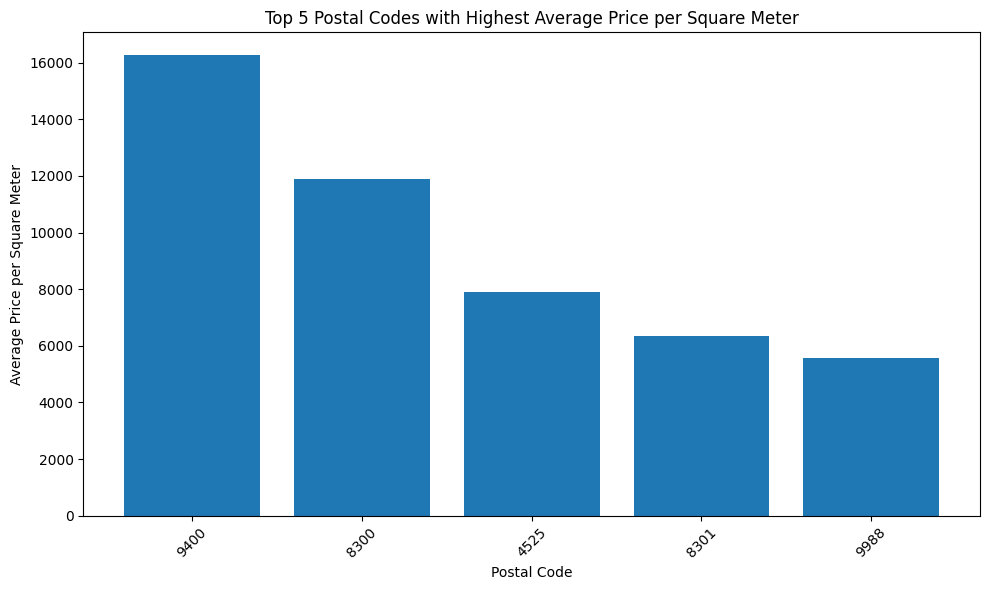

In [65]:
#Calculate price per square meter
immo_dataset['price_per_sqm'] = immo_dataset['price'] / immo_dataset['habitable_surface']

#Group by postal code and calculate the average price_per_sqm
postal_code_stats = immo_dataset.groupby('postal_code')['price_per_sqm'].mean()

#Sort the postal codes based on the average price_per_sqm in descending order
top_5_postal_codes = postal_code_stats.nlargest(5)

#Plotting the average price_per_sqm for the top 5 postal codes
plt.figure(figsize=(10, 6))
plt.bar(top_5_postal_codes.index, top_5_postal_codes.values)
plt.title('Top 5 Postal Codes with Highest Average Price per Square Meter')
plt.xlabel('Postal Code')
plt.ylabel('Average Price per Square Meter')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('top_5_price_per_sqm.jpg')  # Save the image
plt.show


What are the most expensive municipalities in Wallonia? (Average price, median price, price per square meter)


In [ ]:

# Filter the dataframe to include only Wallonia (Wallonie) region
wallonia_data = immo_dataset[immo_dataset['region'] == 'Wallonie']

# Group by postal code and calculate the average price
postal_code_stats = wallonia_data.groupby('postal_code')['price'].median()

# Sort the postal codes based on the average price in descending order
most_expensive_postal_codes = postal_code_stats.sort_values(ascending=False).head(10)

# Plotting the top 10 most expensive postal codes in Wallonia
plt.figure(figsize=(10, 6))
most_expensive_postal_codes.plot(kind='bar')
plt.title('Top 5 Most Expensive Postal Codes in Wallonia')
plt.xlabel('Postal Code')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


What are the most expensive municipalities in Flanders? (Average price, median price, price per square meter)


In [ ]:
# Filter the dataframe to include only Flanders region
flanders_data = immo_dataset[immo_dataset['region'] == 'Flanders']

# Group by postal code and calculate the average price
postal_code_stats = flanders_data.groupby('postal_code')['price'].mean()

# Sort the postal codes based on the average price in descending order
top_10_expensive_postal_codes = postal_code_stats.nlargest(5)

# Plotting the top 10 most expensive postal codes in Flanders
plt.figure(figsize=(10, 6))
top_10_expensive_postal_codes.plot(kind='bar')
plt.title('Top 5 Most Expensive Postal Codes in Flanders')
plt.xlabel('Postal Code')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

What are the less expensive municipalities in Belgium? (Average price, median price, price per square meter)


In [ ]:

# Group by postal code and calculate the average price, median price, and price per square meter
postal_code_stats = immo_dataset.groupby('postal_code').agg(
    average_price=('price', 'mean'),
    median_price=('price', 'median'),
    average_price_per_sqm=('price_per_sqm', 'mean')
)

# Sort the postal codes based on the average price in ascending order
least_expensive_postal_codes = postal_code_stats.nsmallest(10, 'average_price').head(5)

# Plotting the least expensive postal codes
plt.figure(figsize=(10, 6))
least_expensive_postal_codes['average_price'].plot(kind='bar')
plt.title('Top 5 Least Expensive Postal Codes in Belgium')
plt.xlabel('Postal Code')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Top 10 Least Expensive Postal Codes in Belgium.jpg')
plt.show()


What are the less expensive municipalities in Wallonia? (Average price, median price, price per square meter)


In [ ]:

# Filter the dataset for Wallonia
wallonia_dataset = immo_dataset[immo_dataset['region'] == 'Wallonie']

# Group by postal code and calculate the average price, median price, and price per square meter
postal_code_stats = wallonia_dataset.groupby('postal_code').agg(
    average_price=('price', 'mean'),
    median_price=('price', 'median'),
    average_price_per_sqm=('price', 'price_per_sqm')
)

# Sort the postal codes based on the average price in ascending order
least_expensive_postal_codes_average = postal_code_stats.nsmallest(5, 'average_price')
least_expensive_postal_codes_median = postal_code_stats.nsmallest(5, 'median_price')
least_expensive_postal_codes_price_per_sq_meter = postal_code_stats.nsmallest(5, 'price_per_sqm')
# Plotting the least expensive postal codes in Wallonia
plt.figure(figsize=(10, 6))
least_expensive_postal_codes['average_price'].plot(kind='bar')
plt.title('Top 5 Least Expensive Postal Codes in Wallonia')
plt.xlabel('Postal Code')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('least_expensive_wallonia.jpg')  # Save the image
plt.show()


In [ ]:

mean_values = least_expensive_postal_codes_average['average_price']
median_values = least_expensive_postal_codes_median['median_price']
price_per_square_meter_values = least_expensive_postal_codes_price_per_sq_meter['price_per_sqm']
#Generating x-axis labels for the bars
labels = least_expensive_postal_codes.index
x = np.arange(len(labels))

#Width of the bars
width = 0.35

#Creating the figure and axes
fig, ax = plt.subplots()

#Plotting the mean values as blue bars
ax.bar(x - width/2, mean_values, width, label='Mean', color='blue')

#Plotting the median values as orange bars
ax.bar(x + width/2, median_values, width, label='Median', color='orange')

#Plotting the price per ssquare meter values as orange bars

ax.bar(x + width, price_per_square_meter_values, width, label='Price per square meter', color='green')

#Adding labels, title, and legend
ax.set_xlabel('Postal Code')
ax.set_ylabel('Price')
ax.set_title('Mean, Median and pirice per square meter comparison - Least Expensive Postal Codes in Wallonia')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

#Displaying the plot
plt.show()

What are the less expensive municipalities in Flanders? (Average price, median price, price per square meter)


In [ ]:

# Filter the dataset for Flanders
flanders_dataset = immo_dataset[immo_dataset['region'] == 'Flanders']

# Group by postal code and calculate the average price, median price, and price per square meter
postal_code_stats = flanders_dataset.groupby('postal_code').agg(
    average_price=('price', 'mean'),
    median_price=('price', 'median'),
    average_price_per_sqm=('price_per_sqm', 'mean')
)

# Sort the postal codes based on the average price in ascending order
least_expensive_postal_codes = postal_code_stats.nsmallest(5, 'average_price')

# Plotting the least expensive postal codes in Flanders
plt.figure(figsize=(10, 6))
least_expensive_postal_codes['average_price'].plot(kind='bar')
plt.title('Top 5 Least Expensive Postal Codes in Flanders')
plt.xlabel('Postal Code')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('least_expensive_flanders.jpg')  # Save the image
plt.show()
